Monte Carlo integration
=======================

Imagine that we want to measure the area of a pond with arbitrary shape.
Suppose that this pond is in the middle of a field with known area $A$.
If we throw $N$ stones randomly, such that they land within the
boundaries of the field, and we count the number of stones that fall in
the pond $N_{in}$, the area of the pond will be approximately
proportional to the fraction of stones that make a splash, multiplied by
$A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example
of the “Monte Carlo” method.

Simple Monte Carlo integration - Mean Value Theorem
------------------------------

More generaly, imagine a rectangle of height $H$ in the integration
interval $[a,b]$, such that the function $f(x)$ is within its
boundaries. Compute $n$ pairs of random numbers $(x_i,y_i)$ such that
they are uniformly distributed inside this rectangle. The fraction of
points that fall within the area contained below $f(x)$, <span>*i.
e.*</span>, that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio of the integral of $f(x)$ and the area of the rectangle. Hence, the
estimate of the integral will be given by:
$$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a).
$$

Another Monte Carlo procedure is based on the definition:
$$\langle f \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.
$$ In order to determine this average, we sample the
value of $f(x)$:
$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ where the
$N$ values $x_i$ are distributed unformly in the interval $[a,b]$. The
integral will be given by \begin{equation}I(N)=(b-a) \langle f \rangle.\end{equation}

Monte Carlo error analysis
--------------------------

The Monte Carlo method clearly yields approximate results. The accuracy
depends on the number of values $N$ that we use for the average. A
possible measure of the error is the “variance” $\sigma^2$ defined by:
\begin{equation}\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2,\end{equation}
 where
$$\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i)$$ and
$$\langle f^2 \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)^2.$$ The
“standard deviation” is $\sigma$. However, we should expect that the
error decreases with the number of points $N$, and the quantity $\sigma$
defined by (2) does not. Hence, this cannot be a good
measure of the error.

Imagine that we perform several measurements of the integral, each of
them yielding a result $I_n$. These values have been obtained with
different sequences of $N$ random numbers. According to the central
limit theorem, these values whould be normally dstributed around a mean
$\langle I
\rangle$. Suppose that we have a set of $M$ of such measurements
${I_n}$. A convenient measure of the differences of these measurements
is the “standard deviation of the means” $\sigma_M$:
\begin{equation}\sigma_M ^2=\langle I^2 \rangle - \langle I \rangle ^2,
\end{equation} where
$$\langle I \rangle = \frac{1}{M} \sum_{n=1}^M I_n$$ and
$$\langle I^2 \rangle = \frac{1}{M} \sum_{n=1}^{M} I_n^2.$$ 
It can be proven that
\begin{equation}\sigma_M \approx \sigma/\sqrt{N}.\end{equation} 
This relation becomes exact in the limit of a very
large number of measurements. Note that this expression implies that the
error decreases with the square root of the number of trials, meaning
that if we want to reduce the error by a factor 10, we need 100 times
more points for the average.

### Example: One dimensional integration 
Consider the integral: $$\int_{0}^{1}4\sqrt{1-x^2}\,dx$$ 


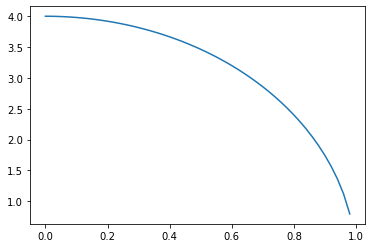

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

x = np.arange(0,1,0.02)
pyplot.plot(x, 4*np.sqrt(1-x**2))

Using the hit and miss method, the following code goes through 16 iterations of increasing the number of points,

100 76 3.04 0.10159265358979308
200 161 3.22 0.07840734641020708
400 313 3.13 0.011592653589793223
800 619 3.095 0.04659265358979292
1600 1234 3.085 0.05659265358979315
3200 2513 3.14125 0.00034265358979324034
6400 5030 3.14375 0.0021573464102067064
12800 10136 3.1675 0.025907346410206866
25600 20169 3.15140625 0.009813596410206848
51200 40094 3.13234375 0.009248903589793134
102400 80364 3.13921875 0.0023739035897931693
204800 160837 3.14134765625 0.00024499733979332916
409600 322080 3.1453125 0.0037198464102070616
819200 644117 3.1451025390625 0.0035098854727069195
1638400 1286776 3.14154296875 4.968483979306271e-05
3276800 2574872 3.143154296875 0.0015616432852070261


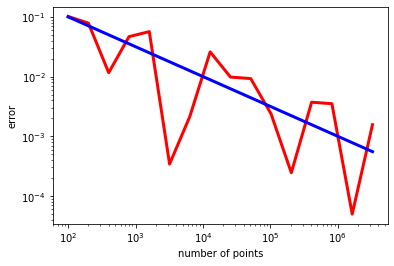

In [2]:
# Hit and miss Monte Carlo integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xlabel('number of points')
pyplot.ylabel('error')
pyplot.xscale('log')
pyplot.yscale('log')

This code implements simple Monte Carlo integration using the mean value theorem

100 2.9669339605597016 0.17465869303009152
200 3.1742486638749656 0.03265601028517251
400 3.0417522042002725 0.09984044938952064
800 3.1441912763735673 0.002598622783774207
1600 3.162819078552322 0.02122642496252869
3200 3.1419261606005695 0.00033350701077639044
6400 3.1395348109089944 0.0020578426807986716
12800 3.134679070930596 0.0069135826591972815
25600 3.131040312371618 0.010552341218175165
51200 3.1374385278085453 0.004154125781247853
102400 3.1437712400423754 0.0021785864525822873
204800 3.142622940506981 0.0010302869171878726
409600 3.1416023352484173 9.681658624138834e-06
819200 3.1423811818963556 0.0007885283065625082
1638400 3.1419774189808867 0.00038476539109355556
3276800 3.1412835956941443 0.00030905789564883435


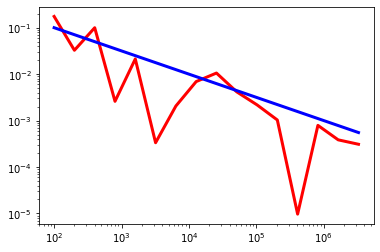

In [3]:
# Simple Monte Carlo Integration - Mean Value Theorem
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    r = np.random.random(n0)
    I[i] = 0.
    for j in range(n0):
        x = r[j]
        I[i] += np.sqrt(1-x**2)
        
    I[i] *= 4./float(n0)
    E[i] = abs(I[i]-np.pi)
    print(n0,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xscale('log')
pyplot.yscale('log')

Importance Sampling
-------------------

Imagine that we want to sample the function $f(x)=e^{-x^2}$ in the
interval $[0,1]$. It is evident that most of our points will fall in the
region where the value of $f(x)$ is very small, and therefore we will
need a large number of values to achieve a decent accuracy. A way to
improve the measurement by reducing the variance is obtained by
“importance sampling”. As the name says, the idea is to sample the
regions with larger contributions to the integral. For this goal, we
introduce a probability distribution $P(x)$ **normalized in the interval
of integration** $$\int _a^b{P(x)dx} = 1.$$ Then, we can rewrite the
integral of $f(x)$ as $$I=\int _a^b{\frac{f(x)}{P(x)}P(x)dx}
$$ We can evaluate this integral, by sampling
according to the probability distribution $P(x)$ and evaluating the sum
$$I(N)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{P(x_i)}.
$$ Note that for the uniform case $P(x)=1/(b-a)$, the
expression reduces to the simple Monte Carlo integral.

We are free to choose $P(x)$ now. We wish to do it in a way to reduce
and minimize the variance of the integrand $f(x)/P(x)$. The way to to
this is picking a $P(x)$ that mimics $f(x)$ where $f(x)$ is large. if we
are able to determine an apropiate $P(x)$, the integrand will be slowly
varying, and hence the variance will be reduced. Another consideration
is that the generation of points according to the distribution $P(x)$
should be a simple task. As an example, let us consider again the
integral $$I=\int _0^1 {e^{-x^2}dx}.$$ A reasonable choice for a weigh
function is $P(x)=Ae^{-x}$, where $A$ is a normalization constant.

Notice that for $P(x)=f(x)$ the variance is zero! This is known as the
zero variance property. There is a catch, though: The probability function
$P(x)$ needs to be normalized, implying that in reality, $P(x)=f(x)/\int f(x)dx$, which
assumes that we know in advance precisely the integral that we are trying to calculate!

### Example 2: Importance sampling 

Choose the weight function $P(x)=e^{-x}$ and evaluate the integral:
    $$\int _0^{\infty} {x^{3/2}e^{-x}dx}.$$


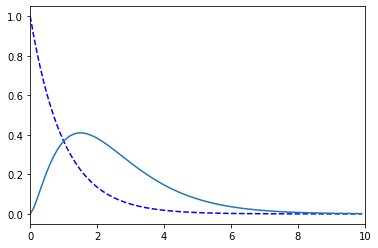

In [3]:
pyplot.xlim(0,10)
x = np.arange(0,10,0.1)
pyplot.plot(x,np.exp(-x),'b--');
pyplot.plot(x,x**1.5*np.exp(-x));

Trapezoids:  1.3293401896452883
Simple Monte Carlo:  0.20055895075257515
Importance Sampling:  1.3288420458546835


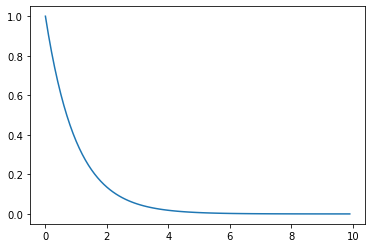

In [4]:
pyplot.plot(x,np.exp(-x));

# Trapezoidal integration
def trapezoids(func, xmin, xmax, nmax):
    Isim = func(xmin)+func(xmax)
    h = (xmax-xmin)/nmax
    for i in range(1,nmax):
        x = xmin+i*h
        Isim += 2*func(x)

    Isim *= h/2
    return Isim

def f(x):
    return x**1.5*np.exp(-x)
    
    
print("Trapezoids: ", trapezoids(f, 0., 20., 100000))

# Simple Monte Carlo integration
n0 = 1000000
r = np.random.random(n0)

Itot = np.sum(r**1.5*np.exp(-r))
print("Simple Monte Carlo: ", Itot/n0)

x = -np.log(r)
Itot = np.sum(x**1.5)
print("Importance Sampling: ", Itot/n0)